# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2

In [1]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
X = faces.data
y = faces.target
print(X.data.shape)

(400, 4096)



## Actividad en clase

Preprocese el dataset usando **PCA**. Para esto haga lo siguiente:

- ¿Cuántas clases tiene el dataset?
- Aplique min-max scaler al dataset.
- Transforme el dataset con PCA para retener el 90% de la varianza.
- Use LOF con k=5 y obtenga el histograma de puntajes LOF. Defina un umbral de corte. 
- Obtenga para el umbral de corte definido los inliers/outliers. Elimine los outliers del dataset. 
- Construya un clasificador de vecinos cercanos con k=5 para training/testing 0.8/0.2. Evalúe el clasificador.
- ¿Por qué algunas clases no están representadas en el testing set?
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


# Solución

### ¿Cuántas clases tiene el dataset?

In [2]:
print(len(set(y)))

40


In [3]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=400)
pca.fit(X)

PCA(n_components=400)

In [5]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


## Calculamos las compoenntes para retener el 90% de la varianza del dataset original
min_var(0.9,pca.explained_variance_ratio_)

65

In [6]:
pca = PCA(n_components=65)
X_= pca.fit_transform(X)

In [7]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(X_)
scores = lof.negative_outlier_factor_

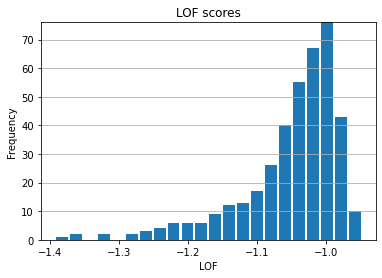

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))


plot_hist(scores, 'LOF scores')

In [9]:
def lof_threshold(v,scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold

lof_threshold(-1.3,scores)

0.0125

In [10]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.0125)
labels = lof.fit_predict(X_)

In [11]:
indices = list(np.where(labels==1)[0])

In [12]:
X_ = X_[indices,:] 

In [13]:
X_.shape

(395, 65)

In [14]:
y = y[indices,]

In [15]:
y.shape

(395,)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=5)
clf = nbrs.fit(X_train, y_train)

In [18]:
clf.score(X_test, y_test)

0.7721518987341772

In [19]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      1.00      1.00         1
           2       0.60      1.00      0.75         3
           3       0.50      0.33      0.40         3
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      0.67      0.80         3
           9       1.00      0.50      0.67         2
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.50      1.00      0.67         1
          15       1.00      0.33      0.50         3
          16       1.00      0.50      0.67         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1.00    

/home/marcelo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marcelo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marcelo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ¿Por qué algunas clases no están en el testing set?

#### Pueden haber sido clases con ejemplos atípicos en el testing set que fueron eliminadas por el LOF. 